In [6]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [182]:
df_hashed = pd.read_csv('hashed_feature.csv')
df_tabular = pd.read_csv('tabular_data.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [183]:
df_tabular = df_tabular[df_tabular['id'] >= 3500]
df_tabular

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
42000,3500,1,110.0,57.0,0.022961,3223.044003,1482.23,0.0,0.221718,1125.87,...,2.21,0,409.140289,0.0,57.0,8.0,0.016187,151.0,912.62,3.0
42001,3500,2,110.0,56.4,0.022098,2660.217134,616.58,0.0,0.670631,324.18,...,1.50,0,46.360127,0.0,56.4,4.0,0.024742,69.0,415.07,6.0
42002,3500,3,110.0,85.5,0.034086,3545.327573,740.75,0.0,0.757050,585.07,...,0.67,0,3.608020,0.0,75.5,1.0,0.053205,101.0,356.75,16.0
42003,3500,4,110.0,83.1,0.035810,4318.052996,512.37,0.0,0.989635,483.15,...,2.14,0,4.338080,2.0,64.5,2.0,0.083362,117.0,431.38,9.0
42004,3500,5,111.0,0.0,0.173657,0.000000,0.00,0.0,0.359067,0.00,...,0.00,0,0.000000,0.0,0.0,0.0,0.147318,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61267,5105,8,110.0,77.0,NaN,0.000000,95.30,0.0,0.094381,221.85,...,-0.00,0,0.000000,0.0,75.0,0.0,0.082128,43.0,83.97,0.0
61268,5105,9,110.0,77.0,NaN,0.000000,61.87,0.0,0.105878,343.22,...,1.75,0,0.000000,0.0,75.0,0.0,0.077594,49.0,48.02,0.0
61269,5105,10,110.0,106.5,NaN,0.000000,88.05,0.0,0.040169,259.33,...,8.27,0,0.000000,0.0,99.0,1.0,0.109053,43.0,74.52,0.0
61270,5105,11,110.0,45.0,NaN,0.000000,98.40,0.0,0.040810,222.00,...,0.00,0,0.000000,0.0,0.0,0.0,0.101929,35.0,25.83,0.0


In [184]:
df_hashed = df_hashed[df_hashed['id'] >= 3500]
df_hashed

,id,feature_50
176203,3500,cae06132ff2c020283cf2a61086303b9b09a52b7
176204,3500,c7d8d20ddef5d0a6fd1d28068c25a28e23553ad3
176205,3500,eaeff27ef253c0f812472b369645e613734cdeef
176206,3500,6d198c72ebc4e5b428f113d471dd15f26d50754e
176207,3500,1fa4c5637b7439a439e860bbdec0df065fbbe36a
...,...,...
266048,5104,b800c944804d341038e06d26cf560562942069e9
266049,5104,442e9a74e42ad60348408428654a686c4ed222ee
266050,5105,ff3c67182640fdbd26d2273a87c3311f45c68ae2
266051,5105,95ea6c6f652cb29edc327a2449eb8115ebc6841e


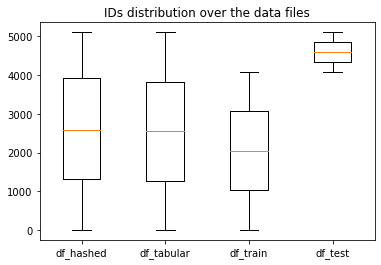

In [10]:
plt.boxplot([df_hashed['id'], df_tabular['id'], df_train['id'], df_test['id']], 
            labels=['df_hashed', 'df_tabular','df_train','df_test']);
plt.title('IDs distribution over the data files');

In [11]:
df_train['id'].min(), df_train['id'].max(), df_test['id'].min(), df_test['id'].max()

(0, 4083, 4084, 5105)

In [12]:
llen = []
idx = []
for i in range(0,len(df_hashed['id'])):
  llen.append(len(df_hashed[df_hashed['id']==i]))
  idx.append(i)
print(min(llen), max(llen))

0 1278


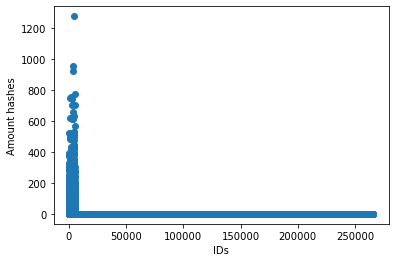

In [13]:
plt.scatter(x = idx , y = llen);
plt.xlabel('IDs');
plt.ylabel('Amount hashes');

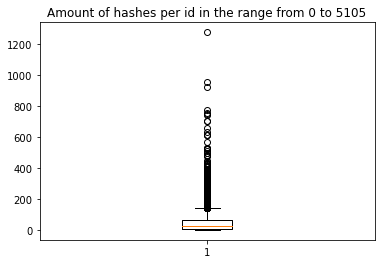

In [14]:
plt.boxplot(llen[:5105]);
plt.title('Amount of hashes per id in the range from 0 to 5105');

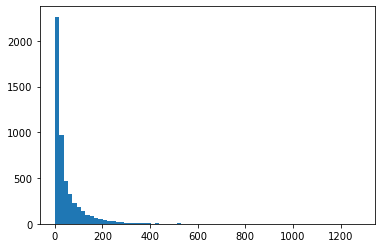

In [18]:
plt.hist(llen[:5105],bins=70);

In [197]:
# Removing ids that are not present in our training and test datat
df_hash2 = df_hashed

In [198]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_hash2['hs'] = le.fit_transform(df_hash2['feature_50'].astype(str))
df_tabular['feature_25'] = le.fit_transform(df_tabular['feature_25'].astype(str))
df_tabular[['feature_25', 'feature_41']] = df_tabular[['feature_25', 'feature_41']].astype(float)

In [199]:
df_hash2

,id,feature_50,hs
176203,3500,cae06132ff2c020283cf2a61086303b9b09a52b7,3790
176204,3500,c7d8d20ddef5d0a6fd1d28068c25a28e23553ad3,3740
176205,3500,eaeff27ef253c0f812472b369645e613734cdeef,4383
176206,3500,6d198c72ebc4e5b428f113d471dd15f26d50754e,2053
176207,3500,1fa4c5637b7439a439e860bbdec0df065fbbe36a,533
...,...,...,...
266048,5104,b800c944804d341038e06d26cf560562942069e9,3435
266049,5104,442e9a74e42ad60348408428654a686c4ed222ee,1268
266050,5105,ff3c67182640fdbd26d2273a87c3311f45c68ae2,4778
266051,5105,95ea6c6f652cb29edc327a2449eb8115ebc6841e,2818


In [200]:
new_ohe = pd.get_dummies(df_hash2, columns = ['hs']).groupby(['id'],as_index=False).sum()

MemoryError: Unable to allocate 411. MiB for an array with shape (89850, 4796) and data type uint8

In [196]:
new_ohe.head()

,id,hs_0,hs_1,hs_2,hs_3,hs_4,hs_5,hs_6,hs_7,hs_8,...,hs_4565,hs_4566,hs_4567,hs_4568,hs_4569,hs_4570,hs_4571,hs_4572,hs_4573,hs_4574
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
new_ohe.shape , df_tabular.shape

((1001, 4576), (12012, 52))

In [159]:
from sklearn.impute import SimpleImputer
imp_ = SimpleImputer(missing_values=np.nan, strategy='median')

df_tabular.loc[:,'feature_0':'feature_49'] = df_tabular.loc[:,'feature_0':'feature_49'].fillna(np.nan)
df_tabular.loc[:,'feature_0':'feature_49'] = imp_.fit_transform(df_tabular.loc[:,'feature_0':'feature_49'].values)

In [163]:
# Groupby Period and drop period variable
df_tabular = df_tabular.loc[:,'id':'feature_49'].groupby(['id'],as_index=False).sum()

In [165]:
# Concat dataframes
df_final = pd.merge(df_tabular, 
                   new_ohe, 
                   on = 'id')

In [166]:
df_final

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,hs_4565,hs_4566,hs_4567,hs_4568,hs_4569,hs_4570,hs_4571,hs_4572,hs_4573,hs_4574
0,0,78,1320.0,731.00,2.866555,3523.629746,5161.61,0.0000,5.343986,3149.16,...,0,0,0,0,0,0,0,0,0,0
1,1,78,1320.0,1626.50,0.725314,83286.958225,13432.23,0.0000,4.207655,14398.12,...,0,0,0,0,0,0,0,0,0,0
2,2,78,1322.0,7.17,6.825614,1.696433,50.02,0.0000,10.500171,3149.16,...,0,0,0,0,0,0,0,0,0,1
3,3,78,1320.0,862.50,6.653668,4645.475341,2521.39,0.0000,6.116438,2854.92,...,0,0,0,0,0,0,0,0,0,0
4,4,78,1320.0,1512.00,1.604314,30819.401741,5523.99,0.0000,12.082259,6269.39,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,78,1320.0,840.01,5.698672,0.000000,6779.45,0.0000,15.935045,4336.13,...,0,0,0,0,0,0,0,0,0,0
997,997,78,1320.0,1749.15,2.777551,6165.075721,16839.28,246.6882,0.000424,15736.07,...,0,0,0,0,0,0,0,0,0,0
998,998,78,1320.0,1881.80,1.651688,159632.383672,1965.88,0.0000,9.595081,901.07,...,0,0,0,0,0,0,0,0,0,0
999,999,78,1320.0,900.00,7.150941,98.088305,2371.53,0.0000,10.672218,3692.81,...,0,0,0,0,0,0,0,0,0,0


In [168]:
# Identifying missing IDs. 
s1 = set(df_tabular['id'])
s2 = set(new_ohe['id'])
s1.difference(s2)

set()

In [169]:
# There are no missing values in the final dataframe
sum(df_final.isna().sum())

0

In [170]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
df_final.loc[:, 'feature_0':] = feature_scaler.fit_transform(df_final.loc[:, 'feature_0':])

In [171]:
df_final.head()

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,hs_4565,hs_4566,hs_4567,hs_4568,hs_4569,hs_4570,hs_4571,hs_4572,hs_4573,hs_4574
0,0,78,-0.242818,-0.428024,-0.230039,-0.306616,0.019807,-0.258935,-0.405451,-0.342849,...,-0.044744,-0.063341,-0.044744,-0.031623,-0.083918,-0.127451,-0.031623,-0.077654,-0.077654,-0.296721
1,1,78,-0.242818,0.786788,-0.948469,0.503241,1.572070,-0.258935,-0.719224,1.991256,...,-0.044744,-0.063341,-0.044744,-0.031623,-0.083918,-0.127451,-0.031623,-0.077654,-0.077654,-0.296721
2,2,78,0.329763,-1.409954,1.098307,-0.342375,-0.939556,-0.258935,1.018318,-0.342849,...,-0.044744,-0.063341,-0.044744,-0.031623,-0.083918,-0.127451,-0.031623,-0.077654,-0.077654,3.370167
3,3,78,-0.242818,-0.249635,1.040616,-0.295225,-0.475720,-0.258935,-0.192155,-0.403902,...,-0.044744,-0.063341,-0.044744,-0.031623,-0.083918,-0.127451,-0.031623,-0.077654,-0.077654,-0.296721
4,4,78,-0.242818,0.631461,-0.653547,-0.029475,0.087820,-0.258935,1.455177,0.304584,...,-0.044744,-0.063341,-0.044744,-0.031623,-0.083918,-0.127451,-0.031623,-0.077654,-0.077654,-0.296721
